<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [197]:
import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## B. Load and understand the dataset

In [198]:
# put your answer here

df = pd.read_excel("/Users/yscalify/Academics/machine_learning/venv/personality.xlsx")
df.head()


,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Gian Colinares,1,1,1,540,1
1,Jessie James,1,1,1,411,1
2,Eliakim Malinana,0,0,1,994,0
3,Rafaellah Herrero,0,0,1,252,0
4,Jerico Lim,1,1,1,489,1


1. Display the summary of all the features of the dataset using `.info()`

In [199]:
# put your answer here

df.drop(columns='Name', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       51 non-null     int64
 1   Active in social media?      51 non-null     int64
 2   Replies to comments?         51 non-null     int64
 3   Number of friends/followers  51 non-null     int64
 4   Personality                  51 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


2. Display the total number of samples from each label using `.value_counts()`

In [200]:
# put your answer here

df['Personality'].value_counts()

Personality
1    28
0    23
Name: count, dtype: int64

## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [201]:
# put your answer here

X = df.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [202]:
# put your answer here
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [203]:
# put your answer here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 4)
(11, 4)
(40,)
(11,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [204]:
k_range = list(range(1,30))
scores = []
best_k = 0
best_score = float('-inf')

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test) 
    
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_test, y_test)
        best_k = k
        print(f"Best model - k = {k}, Accuracy: {best_score}")

    scores.append(knn.score(X_test, y_test))


Best model - k = 1, Accuracy: 0.6363636363636364
Best model - k = 8, Accuracy: 0.7272727272727273


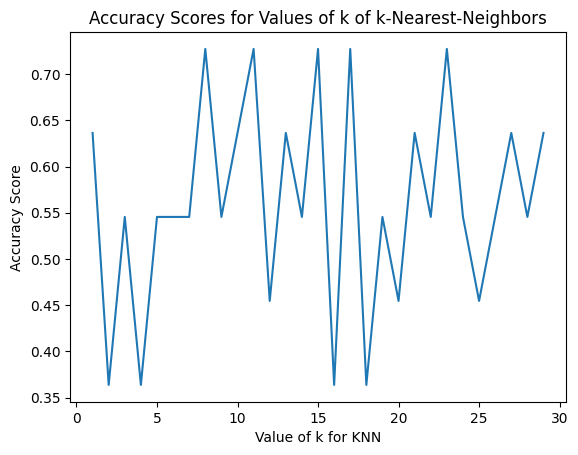

In [205]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [206]:
knn = KNeighborsClassifier(n_neighbors=best_k)

7. Train the model using the `.fit()`

In [207]:
# put your answer here

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

8. Test the model using the `.predict()`

In [208]:
# put your answer here

y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

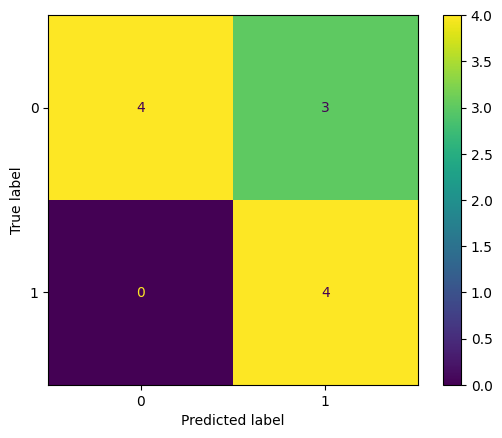

In [209]:
# put your answer here

conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [210]:
# put your answer here
metrics.accuracy_score(y_test, y_pred)

0.7272727272727273

11. Display the precision

In [211]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.57142857 1.        ]


12. Display the recall

In [212]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.         0.57142857]


13. Display the f1-score

In [213]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.72727273 0.72727273]


In [214]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.57      0.73         7

    accuracy                           0.73        11
   macro avg       0.79      0.79      0.73        11
weighted avg       0.84      0.73      0.73        11



In [215]:
knn.predict([[0,1,0,1000]])

array([0])